In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
dataset = pd.read_csv('AirPassengers.csv')

In [4]:
dataset.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
dataset.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


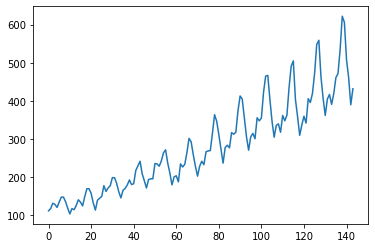

In [6]:
plt.plot(dataset.iloc[:,1])

In [8]:
dataset.iloc[:,1]

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: #Passengers, Length: 144, dtype: int64

In [10]:
dataset.shape

(144, 2)

In [11]:
scaler = MinMaxScaler(feature_range = (0,1)) #Converting the data between 0=1
dataset = scaler.fit_transform(dataset.iloc[:, 1:])

In [12]:
dataset.shape

(144, 1)

In [14]:
dataset

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [16]:
training = int(len(dataset)*0.65)
training

93

In [17]:
test = len(dataset) - training

In [18]:
test

51

In [22]:
train_data, test_data = dataset[0:training,:], dataset[training:len(dataset), :1]

In [20]:
train_data

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

In [25]:
def create_data(dataset , time_step = 1):
    datasetX, datasetY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        datasetX.append(a)
        datasetY.append(dataset[i + time_step, 0])
    return np.array(datasetX), np.array(datasetY)

In [27]:
time_step = 4
X_train , y_train = create_data(train_data, time_step)
X_test, y_test = create_data(test_data, time_step)

In [29]:
X_train.shape, y_train.shape

((88, 4), (88,))

In [30]:
X_train = X_train.reshape(X_train.shape[0], 4, 1)
X_test = X_test.reshape(X_test.shape[0], 4, 1)

In [31]:
X_train

array([[[0.01544402],
        [0.02702703],
        [0.05405405],
        [0.04826255]],

       [[0.02702703],
        [0.05405405],
        [0.04826255],
        [0.03281853]],

       [[0.05405405],
        [0.04826255],
        [0.03281853],
        [0.05984556]],

       [[0.04826255],
        [0.03281853],
        [0.05984556],
        [0.08494208]],

       [[0.03281853],
        [0.05984556],
        [0.08494208],
        [0.08494208]],

       [[0.05984556],
        [0.08494208],
        [0.08494208],
        [0.06177606]],

       [[0.08494208],
        [0.08494208],
        [0.06177606],
        [0.02895753]],

       [[0.08494208],
        [0.06177606],
        [0.02895753],
        [0.        ]],

       [[0.06177606],
        [0.02895753],
        [0.        ],
        [0.02702703]],

       [[0.02895753],
        [0.        ],
        [0.02702703],
        [0.02123552]],

       [[0.        ],
        [0.02702703],
        [0.02123552],
        [0.04247104]],

       [[0

In [35]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (4,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = "mean_squared_error", optimizer = "adam")
model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100, batch_size = 1, verbose = 1)

Epoch 1/100
88/88 [==============================] - 12s 47ms/step - loss: 0.0205 - val_loss: 0.0257
Epoch 2/100
88/88 [==============================] - 1s 10ms/step - loss: 0.0083 - val_loss: 0.0292
Epoch 3/100
88/88 [==============================] - 1s 10ms/step - loss: 0.0075 - val_loss: 0.0290
Epoch 4/100
88/88 [==============================] - 1s 10ms/step - loss: 0.0052 - val_loss: 0.0303
Epoch 5/100
88/88 [==============================] - 1s 10ms/step - loss: 0.0058 - val_loss: 0.0354
Epoch 6/100
88/88 [==============================] - 1s 10ms/step - loss: 0.0052 - val_loss: 0.0326
Epoch 7/100
88/88 [==============================] - 1s 10ms/step - loss: 0.0070 - val_loss: 0.0558
Epoch 8/100
88/88 [==============================] - 1s 10ms/step - loss: 0.0049 - val_loss: 0.0310
Epoch 9/100
88/88 [==============================] - 1s 12ms/step - loss: 0.0049 - val_loss: 0.0283
Epoch 10/100
88/88 [==============================] - 1s 11ms/step - loss: 0.0049 - val_loss: 0.022

In [37]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

In [38]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

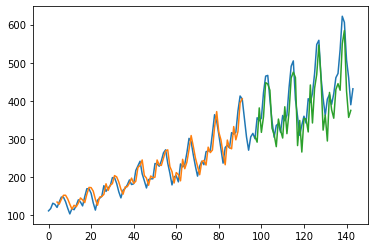

In [47]:
### Plotting 
# shift train predictions for plotting
look_back=4
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(dataset)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()